# Quiz 2: python essentials and data analysis

#### Date: 20 September 2024

#### Credits: 20 points

- When you finish, please send a single **.ipynb** file via email to wbanda@yachaytech.edu.ec


- This classwork is **individual**. Please include your name in the notebook.


- Copying and pasting code from **AI applications is a breach of academic integrity**. Code should be your own!


- Within a **single python notebook**, solve the following problems:

## Name: 

### Problem 1 (Fermi-Dirac distribution, 10 points):

The **Fermi-Dirac distribution** describes the probability that a quantum state with energy $E$ is occupied by a fermion (e.g. by an electron) at thermal equilibrium. The Fermi-Dirac distribution is:

$$f(E) = \frac{1}{e^{(E - E_{\rm F})/k_B T} + 1}$$

Where:

- $f(E)$ is the probability that a state with energy $E$ is occupied.

- $E$ is the energy of the state.

- $E_{\rm F}$ is the chemical potential (also called the Fermi level at $T=0\,\rm K$).

- $k_B$ is the Boltzmann constant.

- $T$ is the absolute temperature.

The exponential term $e^{(E - E_{\rm F})/k_B T}$ controls how the occupancy changes with energy and temperature.

### Tasks:

(a) Create a python lambda function to convert the Boltzmann constant from SI units ($\rm J/K$) to units of $\rm eV/K$ (**Hint:** using the fundamental constants from scipy may be helpful).



In [1]:
# Let's use Scipy (Scientific Python Library)
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cte
# Define Boltzmann constant

k_b = cte.k
# print(k_b) #Prove the constant is SI


In [2]:
#Create the lambda function to convert from J K^-1 to eV K^-1:
converBk = lambda k_b: k_b*(6.242*(10)**18)
print(converBk(k_b))
kb_eV=converBk(k_b)

8.618011058000001e-05


(b) Create a python function that reads in the Fermi level, the absolute temperature, and the energy of the state, and then returns the (Fermi-Dirac) probability distribution function, $f(E)$. The Boltzmann constant should be in units of $\rm eV/K$.


$$f(E) = \frac{1}{e^{(E - E_{\rm F})/k_B T} + 1}$$

Where:

- $f(E)$ is the probability that a state with energy $E$ is occupied.

- $E$ is the energy of the state.

- $E_{\rm F}$ is the chemical potential (also called the Fermi level at $T=0\,\rm K$).

- $k_B$ is the Boltzmann constant.

- $T$ is the absolute temperature.

In [3]:
def FermiDiracProb(fermiLevel,absTemp,energyState):
    """ 
    Inputs:
    -f_E $f(E)$ is the probability that a state with energy $E$ is occupied.
    -energyState $E$ is the energy of the state.
    -fermiLevel $E_{rm F}$ is the chemical potential (also called the Fermi level at $T=0,rm K$).
    - $k_B$ is the Boltzmann constant.
    -absTemp $T$ is the absolute temperature.
    
    """
    kb_eV=converBk(k_b)
    expon=(energyState-fermiLevel)/(kb_eV*absTemp)
    denomitator=np.exp(expon)+1
    f_E=1/denomitator
    
    return f_E

(c) Define a python dictionary containing the symbols of the $5$ following materials as "keys" with their respective Fermi levels ($E_{\rm F}$) as elements.

- Silicon ($\rm Si$) has $E_{\rm F}=1.1\,\rm eV$

- Gallium Arsenide ($\rm Ga\,As$) has $E_{\rm F}=1.4\,\rm eV$

- Gold ($\rm Au$) has $E_{\rm F}=5.5\,\rm eV$

- Copper ($\rm Cu$) has $E_{\rm F}=7\,\rm eV$

- Aluminum ($\rm Al$) has $E_{\rm F}=11.6\,\rm eV$





In [4]:
# Define a dictionary:

dict_FermiLevel = {"Si": 1.1 , "GaAs": 1.4 , "Au": 5.5, "Cu": 7, "Al":11.6}
# print(dict_Symbols["Si"],"eV")

(d) Generate a 1D energy vector covering a reasonable range of energies in $\rm eV$, and fix the temperature of the gas at $100\,\rm K$.



In [5]:
# Generate a new 1D vector:
energyVector = np.arange(0.5, 12, 0.001)
T=100
# print(x)

(e) Using the values of Fermi levels ($E_{\rm F}$) from the dictionary in point (c), and the fixed energy vector and temperature defined in point (d), call the function created in point (b) to obtain a set of arrays with the Fermi-Dirac distributions, $f(E)$, for each material. (**Hint:** a for loop can help access the dictionary elements).



In [6]:
# print(list(dict_FermiLevel.values()))
#create an array that contain the probability that a state with energy E is occupied.
new_vectorFermiDiracProb=[]
#using the dictionary get all the energies
for x in list(dict_FermiLevel.values()):
    #Evaluate the energies in the temperature =100 and the energy vector defined from 1 to 12
    new_vector=FermiDiracProb(x,T,energyVector)
    #Add the new y axis to the collection of the arrays that contains the probability
    # of a state with energy E is occupied.
    new_vectorFermiDiracProb.append(new_vector)

#Test for the first of the values
# print(new_vectorFermiDiracProb[1])

/tmp/ipykernel_223890/2065010700.py:13: RuntimeWarning: overflow encountered in exp
  denomitator=np.exp(expon)+1


(f) Use matplotlib to make a single high-quality labeled plot of the energy distribution of all 5 materials for the set temperature. The plot should have $f(E)$ on the Y axis and $E$ on the X axis.



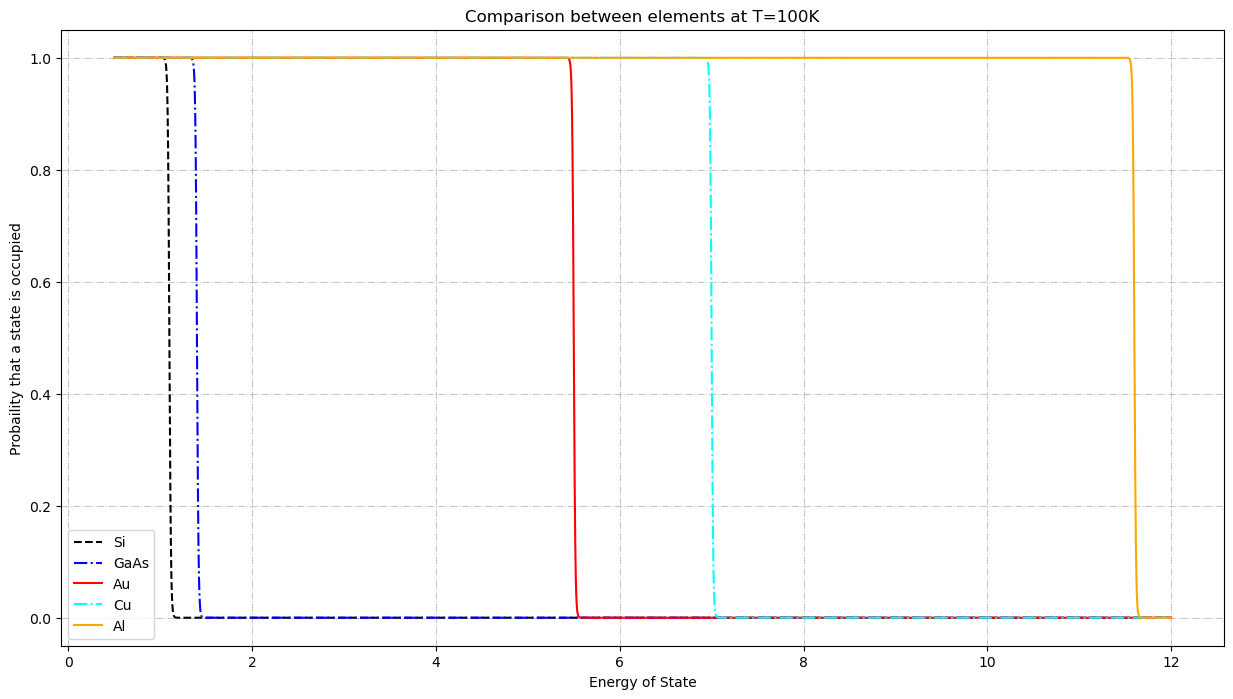

In [7]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Comparison between elements at T=100K')
plt.xlabel('Energy of State')
plt.ylabel('Probaility that a state is occupied')
"""
Using the new_new_vectorFermiDiracProb in the diferent positions that were saved the different
elements starting from Si,GaAS,Au,Cu and Al.
"""
plt.plot(energyVector, new_vectorFermiDiracProb[0], color = "k", label='Si', linestyle='--')
plt.plot(energyVector, new_vectorFermiDiracProb[1], color = "b", label='GaAs', linestyle='-.')
plt.plot(energyVector, new_vectorFermiDiracProb[2], color = "r", label='Au')
plt.plot(energyVector, new_vectorFermiDiracProb[3], color = "aqua", label='Cu', linestyle='-.')
plt.plot(energyVector, new_vectorFermiDiracProb[4], color = "orange", label='Al')


plt.grid(linestyle='-.',alpha=0.7)


plt.legend()
plt.show()
plt.close()

(g) Repeat steps (d,e,f) for 3 more temperatures ($0\,\rm K$, $400\,\rm K$, and $1000\,\rm K$), and report all the results in a single 4-panel high-quality labeled figure. Each panel should show the results for each temperature ($0\,\rm K$, $100\,\rm K$, $400\,\rm K$, and $1000\,\rm K$).



In [8]:
#Define an list of temperatures
temp=[0,100,400,100]
#Create a new list that contain all the data requested
FermiDiracProb4temps=[]
#For loop to evaluate each element in each temperature
for abstemp in list(temp):
    #For loop that gets the energy Fermi levels
    """
    Ex: temp 0
    All the materials are evaluated at that temp 
    """
    print("Evaluated in temp ", abstemp)
    for x in list(dict_FermiLevel.values()):

       #Evaluate the Fermi energy in the different temperatures for each case
        new_vector=FermiDiracProb(x,abstemp,energyVector)
        """
        Collect the data in an array that contains the information
        required for all the materials, the order is
        Example:
        temperature (0) for all the elements (Si,GaAS,Au,Cu and Al)
        
        """
        FermiDiracProb4temps.append(new_vector)
print(len(FermiDiracProb4temps))

Evaluated in temp  0
Evaluated in temp  100
Evaluated in temp  400
Evaluated in temp  100
20


/tmp/ipykernel_223890/2065010700.py:12: RuntimeWarning: divide by zero encountered in divide
  expon=(energyState-fermiLevel)/(kb_eV*absTemp)
/tmp/ipykernel_223890/2065010700.py:13: RuntimeWarning: overflow encountered in exp
  denomitator=np.exp(expon)+1


Please use a function to do the plot...


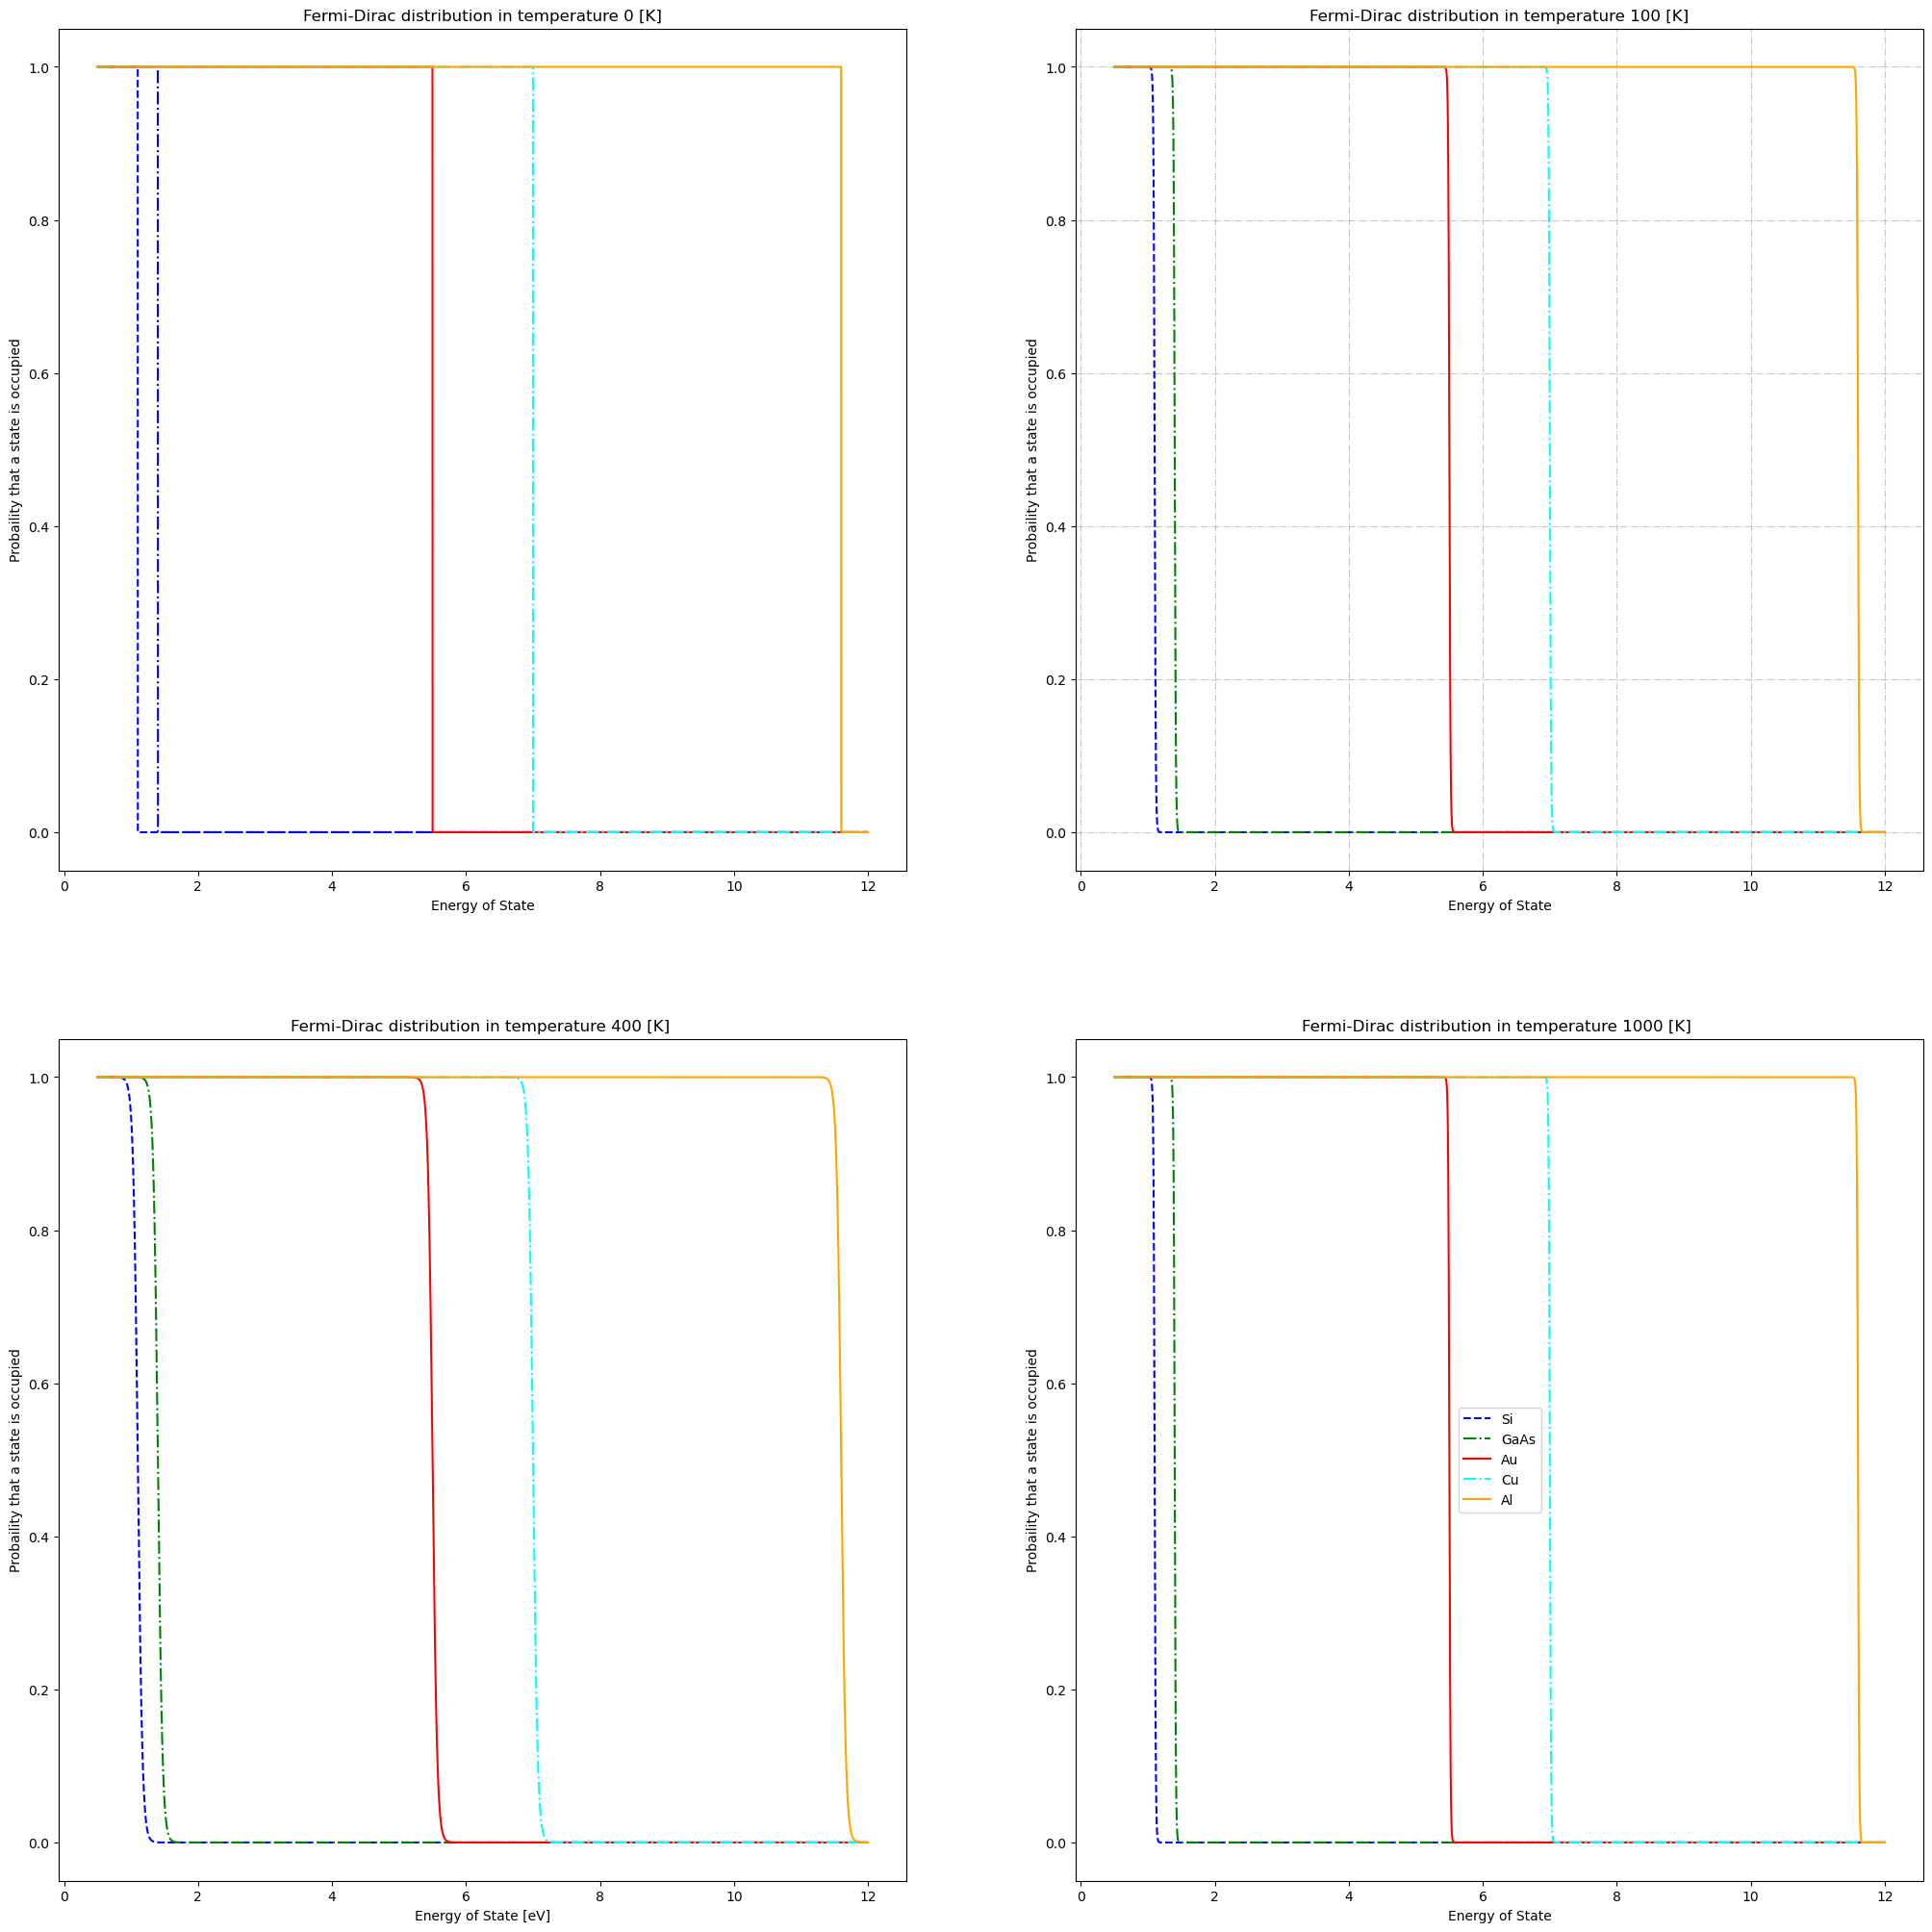

In [9]:
#plot for the first figure
# Plot
plt.figure(figsize=(25,25))
plt.subplot(2,2,1)
plt.title('Fermi-Dirac distribution in temperature 0 [K]')
plt.xlabel('Energy of State')
plt.ylabel('Probaility that a state is occupied')
# for i in range(0,len(FermiDiracProb4temps)):    
plt.plot(energyVector, FermiDiracProb4temps[0],color = "b", label='Si', linestyle='--')
plt.plot(energyVector, FermiDiracProb4temps[1], color = "b", label='GaAs', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[2], color = "r", label='Au')
plt.plot(energyVector, FermiDiracProb4temps[3], color = "aqua", label='Cu', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[4], color = "orange", label='Al')

#plot for the second figure
# Plot
plt.subplot(2,2,2)
plt.title('Fermi-Dirac distribution in temperature 100 [K]')
plt.xlabel('Energy of State')
plt.ylabel('Probaility that a state is occupied')
# for i in range(0,len(FermiDiracProb4temps)):    
plt.plot(energyVector, FermiDiracProb4temps[5],color = "b", label='Si', linestyle='--')
plt.plot(energyVector, FermiDiracProb4temps[6], color = "green", label='GaAs', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[7], color = "r", label='Au')
plt.plot(energyVector, FermiDiracProb4temps[8], color = "aqua", label='Cu', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[9], color = "orange", label='Al')


plt.grid(linestyle='-.',alpha=0.7)
#plot for the second figure
# Plot
plt.subplot(2,2,3)
plt.title('Fermi-Dirac distribution in temperature 400 [K] ')
plt.xlabel('Energy of State [eV]')
plt.ylabel('Probaility that a state is occupied')
# for i in range(0,len(FermiDiracProb4temps)):    
plt.plot(energyVector, FermiDiracProb4temps[10],color = "b", label='Si', linestyle='--')
plt.plot(energyVector, FermiDiracProb4temps[11], color = "green", label='GaAs', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[12], color = "r", label='Au')
plt.plot(energyVector, FermiDiracProb4temps[13], color = "aqua", label='Cu', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[14], color = "orange", label='Al')


#plot for the second figure
# Plot
plt.subplot(2,2,4)
plt.title('Fermi-Dirac distribution in temperature 1000 [K] ')
plt.xlabel('Energy of State')
plt.ylabel('Probaility that a state is occupied')
# for i in range(0,len(FermiDiracProb4temps)):    
plt.plot(energyVector, FermiDiracProb4temps[15],color = "b", label='Si', linestyle='--')
plt.plot(energyVector, FermiDiracProb4temps[16], color = "green", label='GaAs', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[17], color = "r", label='Au')
plt.plot(energyVector, FermiDiracProb4temps[18], color = "aqua", label='Cu', linestyle='-.')
plt.plot(energyVector, FermiDiracProb4temps[19], color = "orange", label='Al')


plt.legend()
plt.show()
plt.close()

In [10]:
# Plot
def plot_same_material(pos,material):
#size of figure
    plt.figure(figsize=(10,5))
    ##Title and labels
    plt.title(f'Comparison between {material} at different temperatures')
    plt.xlabel('Energy of State')
    plt.ylabel('Probaility that a state is occupied')
    """
    Using the new_new_vectorFermiDiracProb in the diferent positions that were saved the different
    elements starting from Si,GaAS,Au,Cu and Al.
    """
    i=0
    color=["k","b","r","aqua","orange"]
    temp=[0,100,400,1000]
    for i in range(4):
        
        plt.plot(energyVector, FermiDiracProb4temps[pos],color = f"{color[i]}", label=f'Temperature {temp[i]} K', linestyle='--')
        pos=pos+5
    # plt.plot(energyVector, FermiDiracProb4temps[pos+5], color = "b", label='Temperature 100 K', linestyle='-.')
    # plt.plot(energyVector, FermiDiracProb4temps[pos+10], color = "r", label='Temperature 400 K')
    # plt.plot(energyVector, FermiDiracProb4temps[pos+15], color = "aqua", label='Temperature 1000 K', linestyle='-.')
    # # plt.plot(energyVector, new_vectorFermiDiracProb[0+15], color = "orange", label='Al')
    
    
    plt.grid(linestyle='-.',alpha=0.7)
    
    
    plt.legend()
    plt.show()
# plot_same_material(2,"GaAs")


### Analysis:

Based on your plots, answer the following questions:

(h) What happens with the energy distributions at low temperatures? Particularly, at $0\,\rm K$?

    Here we can appreciate that the distributions goes sharp at lower temperatures, specifically at t= 0 K it converts in a step function

(i) What happens with the fermion distributions in the materials when we increase the temperature? Why?

    We can appreciate that the functions get a more smooth slope increasing the temperature, by that reason the probability of get another state occupied with less Fermi energy in comparing to the same material. We can appreciate that by the function, as we increase the temperature the exponential se acerca mas a cero, por lo tanto la probabilidad de acerca más a uno y muestra que puede ocupar otro estado
$$f(E) = \frac{1}{e^{(E - E_{\rm F})/k_B T} + 1}$$
In addition this can be showed in the graphic below:

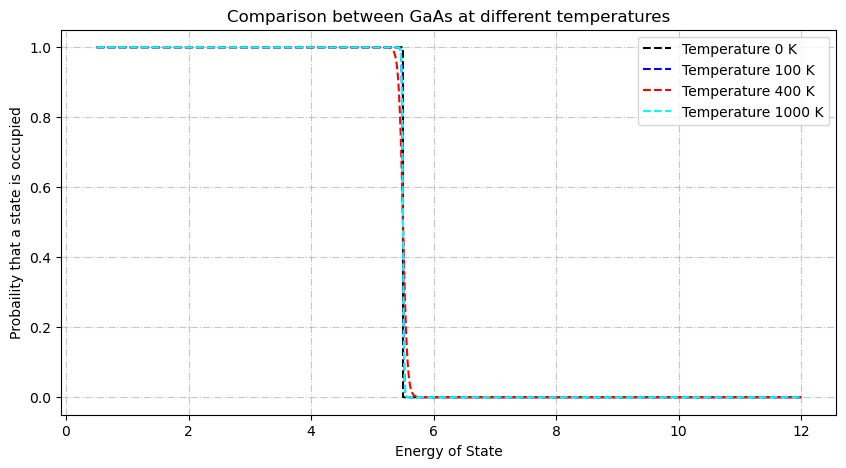

In [11]:
plot_same_material(2,"GaAs")


(j) Can we classify the materials in groups using their $f(E)$ distributions at a fixed temperature? Why do some materials have higher $E_{\rm F}$ than others?

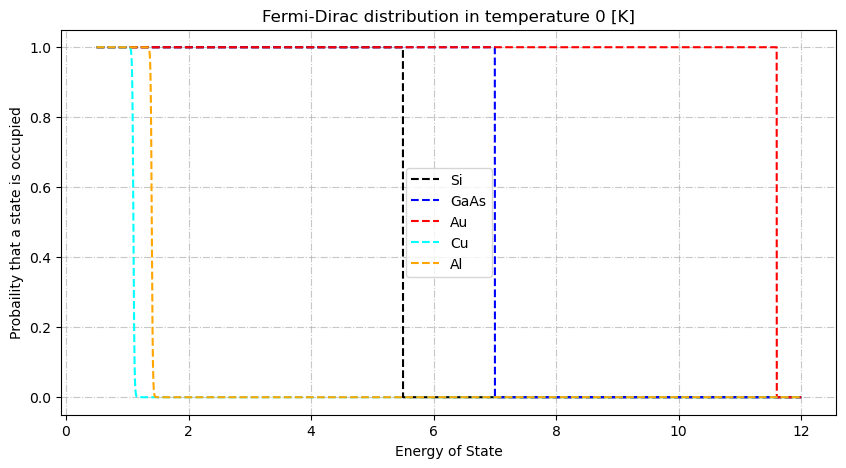

In [12]:
# Plot
def plot_same_prob(pos,temp):
#size of figure
    plt.figure(figsize=(10,5))
    plt.title(f'Fermi-Dirac distribution in temperature {temp} [K]')
    plt.xlabel('Energy of State')
    plt.ylabel('Probaility that a state is occupied')
    i=0
    color=["k","b","r","aqua","orange"]
    material=["Si","GaAs","Au","Cu","Al"]
    temp=[0,100,400,1000]
    for i in range(i+5):
        plt.plot(energyVector, FermiDiracProb4temps[pos],color = f"{color[i]}", label=f'{material[i]}', linestyle='--')
        i=i+1
        pos=pos+1
    plt.grid(linestyle='-.',alpha=0.7)
    plt.legend()
plot_same_prob(2,0)

We can clasify by that way the materials in the case that we would like to take on count just how probable is occupied another state conforme se acerca cada uno a su specific chemical potential 

### Problem 2 (Analysis of atmospheric $^{14}CO_2$, 10 points):

The value of $\Delta^{14}\text{CO}_2$ is defined as the relative difference in the ratio of $^{14}\text{C}$ to $^{12}\text{C}$ in a sample compared to a standard, corrected for isotopic fractionation and radioactive decay. It is expressed as:

$$
\Delta^{14}\text{CO}_2 = \left( \frac{\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{sample}}}{\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{standard}}} - 1 \right) \times 1000
$$

where:

-  $\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{sample}} $ is the ratio of $^{14}\text{C}$ to $^{12}\text{C}$ in the sample,

- $\left( \frac{{^{14}\text{C}}}{{^{12}\text{C}}} \right)_{\text{standard}} $ is the ratio in a standard reference material.


The result is given in permil (‰).


### Data file:

Please download the data file from here:

https://github.com/wbandabarragan/physics-teaching-data/tree/main/1D-data/BHD_14CO2_datasets_20211013.csv


This data file has 60 years of $\Delta^{14}\text{CO}_2$ measurements from New Zealand. The measurements show the rise of the $^{14}\rm C$ due to the so-called **bomb spike** (from nuclear bomb testing), and the subsequent decline in $\Delta^{14}\text{CO}_2$ due to ban of nuclear bomb tests, the natural carbon cycle, and the increase of fosil fuel-based $\rm CO_2$ emissions. Scientists use this data to understand how quickly atmospheric $\rm CO_2$ flows in and out of the oceans and terrestrial ecosystems. We will solely use the first two columns of the file, following the header, i.e. the columns labeled as "Date" and "D14C_trend".

#### Reference:
https://doi.org/10.5194/acp-17-14771-2017

### Tasks:

(a) Inspect the structure of the data file. Then, create an appropriate IO python function that reads the filename, opens the data file using pandas, skips the header lines, place the first two columns ("Date" and "D14C_trend") into pandas objects, and returns them as numpy arrays.



In [13]:
# Import the libraries to use
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
#Define the path
path= 'BHD_14CO2_datasets_20211013.csv'


#Extra steps, we can check also the file in jupyter and skip those steps
#Inspect the data structure:
# df=pd.read_csv(path)
# print(df.head())
#As we can check opening the csv file we can comprobe that the first 14 rows are not useful

In [15]:
def IO(path):
    """
    Input:
        path= the direction where we are going to get the information.
    Data:
        df= create the data frame
        titles define new titles
        dataframe  where we are goung to work changing the titles and size
    Output: 
        dataframe= The data frame
        date= array of the Dates
        d14C_trend= data that we are interested in.
    """
    df=pd.read_csv(path)
    titles= df.iloc[14]
    dataframe = df.iloc[15:]
    dataframe.columns = titles
    # print(df.head())
    #Asign the columns:
    date= np.array(dataframe['Date'])
    # print(date)
    d14C_trend= np.array(dataframe['D14C_trend'])
    return dataframe,  date, d14C_trend

In [16]:
dataframe, date, d14c_trend=IO(path)
# print(d14c_trend)
# test=date.astype(np.float)
#Transfrom to an array that contain float type
date= np.asarray(date, dtype=float)
d14c_trend= np.asarray(d14c_trend, dtype=float)
# print(d14c_trend)

(b) Call your IO function developed in (a) and obtain the time/date axis (in $[yr]$) and $\Delta^{14}\text{CO}_2$ (in ‰). Then, make a high-quality labeled plot of $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis).


In [17]:
#Dataframe= data frame of all the data
#Date is in years about the information
#co2 is the % that is requested
# dataframe, date, co2=IO(path)

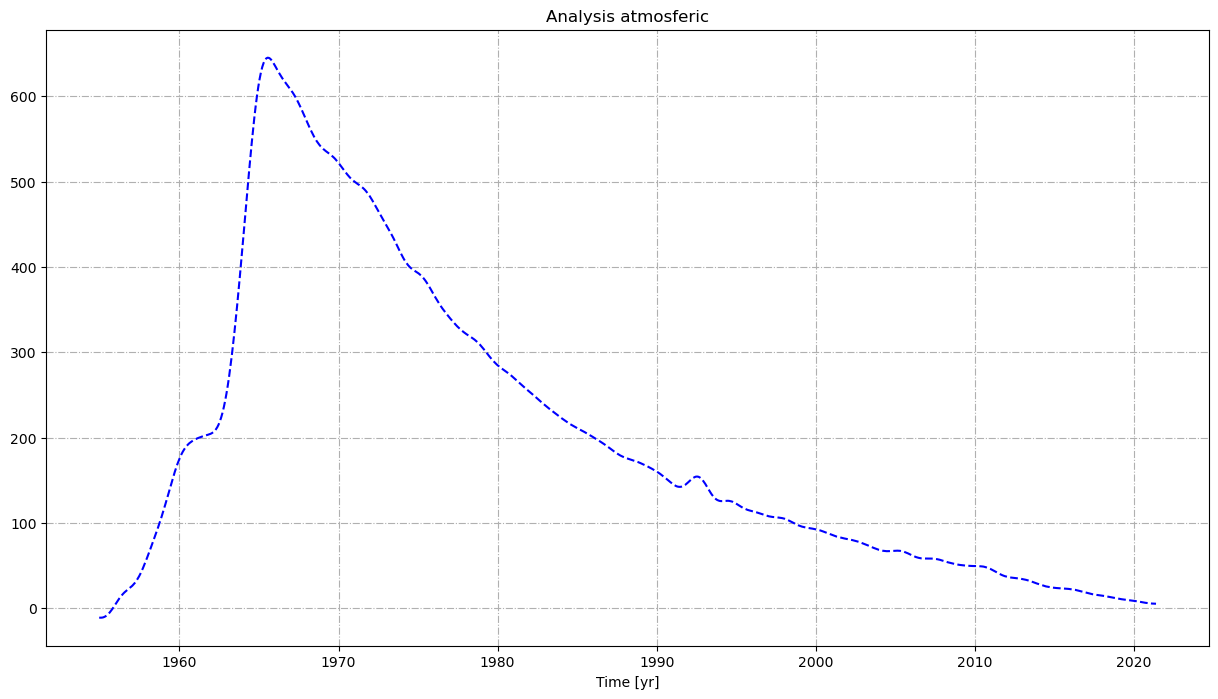

In [18]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
# plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')

plt.plot(date, d14c_trend, color = "b", label=' empty', linestyle='--')



plt.grid(linestyle='-.')


# plt.legend()
plt.show()
plt.close()


(c) Is the relation between the two variables linear? Is it monotonic?


In [19]:
#No is not, we can appreciate a peak and for this a decrement of the function.

In [20]:
###BORRADOR
peak=d14c_trend.max()
print(type(d14c_trend))
y_array = d14c_trend.tolist()
print(type(y_array))
# print(y_array)
# pos_y = np.where(y_array == peak)
pos_y= y_array.index(peak)
print(pos_y)
print(type(pos_y))

<class 'numpy.ndarray'>
<class 'list'>
127
<class 'int'>


(d) Create a python function that identifies the year/date ($t_{\rm max}$) at which the bomb spike reached a maximum ($\Delta^{14}_{\rm max}\text{CO}_2$), and returns the peak coordinate pair: $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$.


In [21]:
def ident_pair(x_array,y_array):
    #Transform to list:
    # x_array = np.array(x_array.tolist())
    # y_array = y_array.tolist()
    peak = y_array.max()
    
    x_array = x_array.tolist()
    y_array = y_array.tolist()
    # pos_y = np.where(y_array == peak)
    pos_y= y_array.index(peak)
    print(pos_y)
    # pos_y = y_array.index(peak)
    par = [x_array[pos_y],y_array[pos_y]]
    return par, pos_y#, x_array, y_array
peak_pair, pos= ident_pair(date, d14c_trend)

print(peak_pair)

127
[1965.5417, 645.3]


(e) Propose a physically-motivated model for the data. Write down your proposed model in a markdown cell, and clearly indicate what the variables and free parameters are. Justify the number of free parameters that you have chosen. **Hint:** Since $\Delta^{14}\text{CO}_2$ involves radioactive decay, using a piece-wise function with exponentials ($\propto \exp{(\pm k\,t)}$ with $k$ being the growth/decay rate) may be a good choice. You should also use the peak coordinate pair $(t_{\rm max},\Delta^{14}_{\rm max}\text{CO}_2)$ computed in (d) to define your model and reduce the number of free parameters.

In [22]:
#Let's define c1 & c2:
#y=c1*np.exp(k1*x)
#c1=y*np.exp(-k1*x)
#y=c2*np.exp(-k2*x)
#c2=y**np.exp(k2*x)

k1=0.3
k2=0.059
c1=peak_pair[1]*np.exp(-k1*peak_pair[0])
c2=peak_pair[1]*np.exp(k2*peak_pair[0])
print(peak_pair[1])
print(c2)
print(date[pos])
test=c2*np.exp(-k2*date[pos])
print(test)
model_func=np.piecewise(date,[date<=date[pos],date>date[pos]], [lambda date: c1*np.exp(k1*date), lambda date: c2*np.exp(-k2*date)])

645.3
1.4913260584146238e+53
1965.5417
645.3


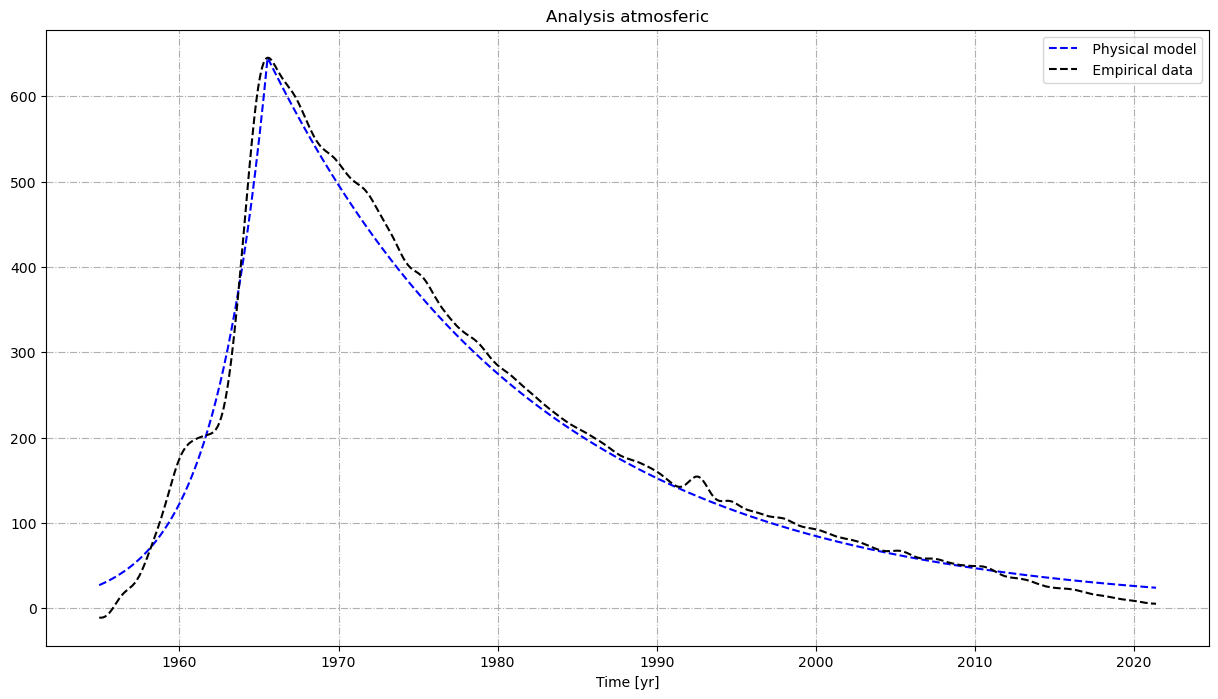

In [23]:
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
# plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')

plt.plot(date, model_func, color = "b", label=' Physical model', linestyle='--')
plt.plot(date, d14c_trend, color = "k", label=' Empirical data', linestyle='--')
# plt.plot(date, d14c_trend, color = "b", label=' empty', linestyle='--')



plt.grid(linestyle='-.')


plt.legend()
plt.show()
plt.close()


(f) Carry out a regression using python tools (e.g. scipy's **curve_fit** function). Report the best-fit function, and comment: what is the decay rate, $k_{\rm fit}$ of $\Delta^{14}\text{CO}_2$? **Hint:** Since the fitting function is not a simple polynomial function, in some implementations it may help to aid curve_fit by providing initial guesses for the free parameters in the regression (see: p0 argument).


In [24]:
import scipy.stats as st
import scipy.optimize as opt

In [25]:
# Model function

def fit_model(domain, k1, k2):
    """
    This is our regression model.
    Inputs: x_values (date), k -> free param.
    Output: model_func
    """
    c1=peak_pair[1]*np.exp(-k1*peak_pair[0])
    c2=peak_pair[1]*np.exp(k2*peak_pair[0])

    model_func=np.piecewise(date,[date<=date[pos],date>date[pos]], [lambda date: c1*np.exp(k1*date), lambda date: c2*np.exp(-k2*date)])

    
    return model_func

coef, cova = opt.curve_fit(fit_model, date, d14c_trend, p0=[0.3,0.059])

print(coef)

# Calculate uncertainties
print("cova es:", cova)
unc_coef = np.sqrt(np.diag(cova))

print("The associated uncertainty are:\n", unc_coef)

[0.29258612 0.05646833]
cova es: [[6.62910706e-06 0.00000000e+00]
 [0.00000000e+00 4.74813684e-08]]
The associated uncertainty are:
 [0.00257471 0.0002179 ]


In [26]:
# # Evaluate l in the regression model
# print(type(norm))
# y_fitted = fit_model(norm, coef[0],coef[1])

# plt.figure(figsize=(15,8))

# plt.plot(date, y_fitted, color = "red")
# # plt.errorbar(l, mean_t, 3*stdv_t, 0, marker = ".", linestyle = " ")
# plt.plot(date, d14c_trend, color = "b", label=' empty', linestyle='--')

# plt.xlabel(r"$L\,\rm [m]$")
# plt.ylabel(r"$T\,\rm [s]$")
# plt.show()




(g) Report the result of your regression including the uncertainties associated with each free parameter in your model, and calculate the global uncertainty obtained via error propagation.

In [27]:
print(pos)

127


Best-fit parameters [0.29258612 0.05646833]
Associate uncertainties: [0.00257471 0.0002179 ]
Error in k is 0.00257
Error in k2 is 0.00022
Global uncertainty is: 


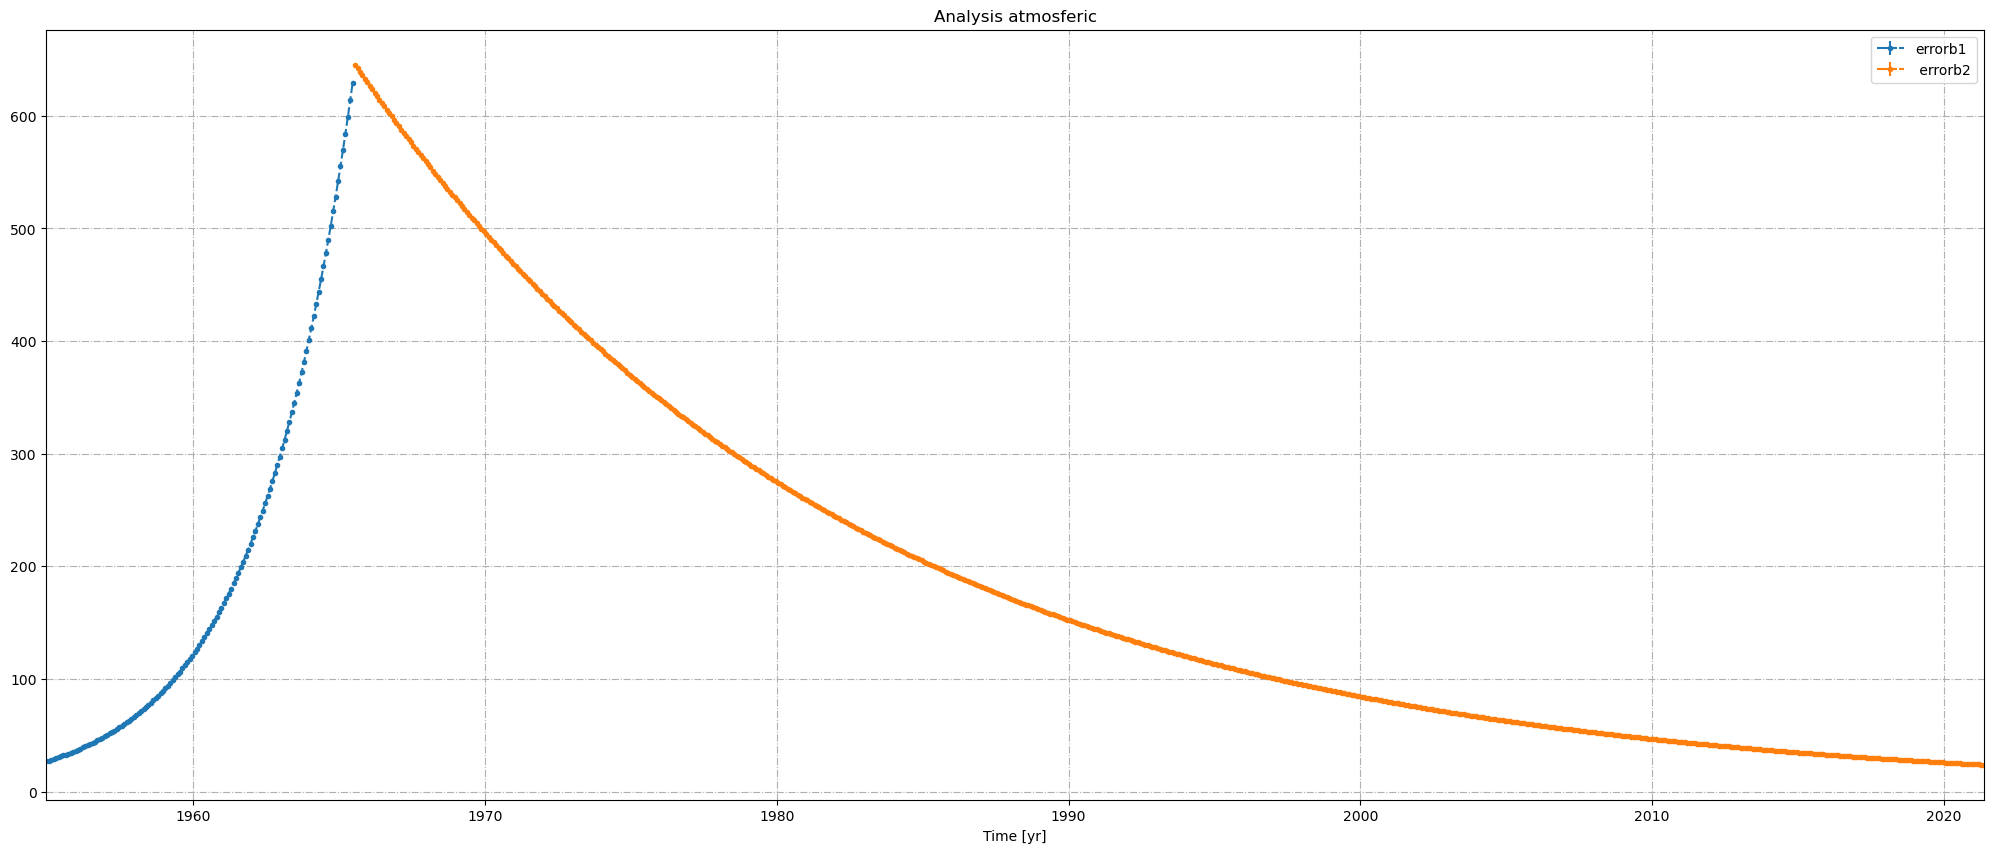

In [28]:

print("Best-fit parameters", coef)

print("Associate uncertainties:", np.sqrt(np.diag(cova)))
err= np.sqrt(np.diag(cova))


print("Error in k is %.5f" % (err[0]))
print("Error in k2 is %.5f" % (err[1]))
def glob_uncert(c1,k,c2,k2):
    sigma2=(c1**(2))*(k**2)+(c2**(2))*(k2**2)+(2*c1*c2)
        
print("Global uncertainty is: ")


# Plot
#size of figure
plt.figure(figsize=(25,10))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
# plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')

# plt.plot(date, model_func, color = "b", label=' empty', linestyle='--')
# plt.plot(date, d14c_trend, color = "k", label=' org', linestyle='--')
#HAVE to be corrected to the specific part of the error
# x_date1=np.linspace(date[0], date[pos], pos)
i=0
x_date1=[]
y_date1=[]
x_date2=np.linspace(date[pos], date[-1], len(date)-pos)
for i in range(pos):
    x_date1.append(date[i])
    y_date1.append(model_func[i])

x_date2=[]
y_date2=[]
for i in range(pos,len(model_func)):
    x_date2.append(date[i])
    y_date2.append(model_func[i])
plt.errorbar(x_date1, y_date1, err[0], 0, marker = ".", label='errorb1', linestyle = "--")

plt.errorbar(x_date2, y_date2, err[1], 0, marker = ".", label=' errorb2',linestyle = "--")

# plt.plot(date, d14c_trend, color = "b", label=' empty', linestyle='--')



plt.grid(linestyle='-.')

plt.xlim(date[0],date[-1])
plt.legend()
plt.show()
plt.close()

In [29]:
print(len(model_func))
print(type(model_func))

798
<class 'numpy.ndarray'>




### Analysis:

(i) Now, you will compare your findings with four semi-empirical decay rate predictions, taken from the litarature. Create a function that uses your model, but uses four predictions for the decay rate ($k_{\rm atm}$, $k_{\rm bio}$, $k_{\rm oce}$, and $k_{\rm sed}$) to return four semi-empirical $\Delta^{14}\text{CO}_2$ decay lines as arrays. Consider the following decay rates based on four contributing factors:

- **Atmospheric decay** due to the mixing and exchange of carbon dioxide in the atmosphere predicts $k_{\rm atm}=0.10\,\rm yr^{-1}$.

- **Biosphere decay** due to vegetation, soil, and organic matter predicts $k_{\rm bio}=0.02\,\rm yr^{-1}$.

- **Ocean decay** due to the long-term ocean absorption and storage of carbon predicts $k_{\rm oce}=0.01\,\rm yr^{-1}$.

- **Sedimentary decay** due to decomposition and mineralization predicts $k_{\rm sed}=0.001\,\rm yr^{-1}$.



In [30]:
def test(list, list2):
    print(list)
    print("another \n")
    print(list2)

list=[0.10,0.02,0.01,0.001]
a=test(list,peak_pair)

[0.1, 0.02, 0.01, 0.001]
another 

[1965.5417, 645.3]


In [31]:
def model_decay(list, peak_pair):
    # list=(k1,k2,k3,k4)
    array_for_arrays=[]
    dom=[date]
    for i in range(len(list)):
        c1=peak_pair[1]*np.exp(-coef[0]*peak_pair[0])
        c2=peak_pair[1]*np.exp(list[i]*peak_pair[0])
        model_func=np.piecewise(date,[date<=date[pos],date>date[pos]], [lambda date: c1*np.exp(coef[0]*date), lambda date: c2*np.exp(-list[i]*date)])
        array_for_arrays.append(model_func)
    return array_for_arrays

decay_lines_arrays=model_decay(list,peak_pair)


(j) Make a high-quality labeled plot showing $\Delta^{14}\text{CO}_2$ (in the Y axis) versus time (in the X axis), showing the empirical data, your best-fit model (obtained from your physically-motivated model, including the uncertainties), and four additional lines (one for every contributing factor above). Can we explain the observed decay of $\Delta^{14}\text{CO}_2$ as due to a single one of these contributing factors? If not, propose a possible decay model for $k_{\rm fit}$ based on all of them.

In [32]:
def plot(array_x,array_y, title,xlabel,ylabel):
    # Plot
    #size of figure
    plt.figure(figsize=(15,8))
    ##Title and labels
    plt.title(f'{title}')
    plt.xlabel(f'{ylabel}')
    # plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')
    
    plt.plot(array_x, array_y, color = "b", label=f'title' , linestyle='--')
    # plt.plot(date, d14c_trend, color = "k", label=' org', linestyle='--')
    #HAVE to be corrected to the specific part of the error
    # plt.errorbar(date, model_func, 3*err[0], 0, marker = ".", label='errorb2', linestyle = "--")
    
    
    
    plt.grid(linestyle='-.')
    
    
    plt.legend()
    plt.show()
    plt.close()

In [33]:
def array_plot(array_x,array_y, title,xlabel,ylabel, label):
    # Plot
    #size of figure
    plt.figure(figsize=(15,8))
    ##Title and labels
    plt.title(f'{title}')
    plt.xlabel(f'{xlabel}')
    # plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')
    plt.title('Here ')
    plt.xlabel('Decay')
    # plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')
    plt.plot(date, d14c_trend, label='Empirical data', linestyle='--')
    plt.plot(date, model_func, color = "b", label=' empty', linestyle='--')
    for i in range(len(array_y)):
        plt.plot(array_x, array_y[i], label=f'{label[i]}', linestyle='--')
    
    plt.grid(linestyle='-.')
    
    plt.legend()
    plt.show()
    plt.close()

In [34]:
# def append_yaxis_plot(original_y_axis,add_y_axis,original_labels,new_label):
#     original_y_axis.append(add_y_axis)
#     original_labels.append(new_label)
#     return original_y_axis, original_labels
    

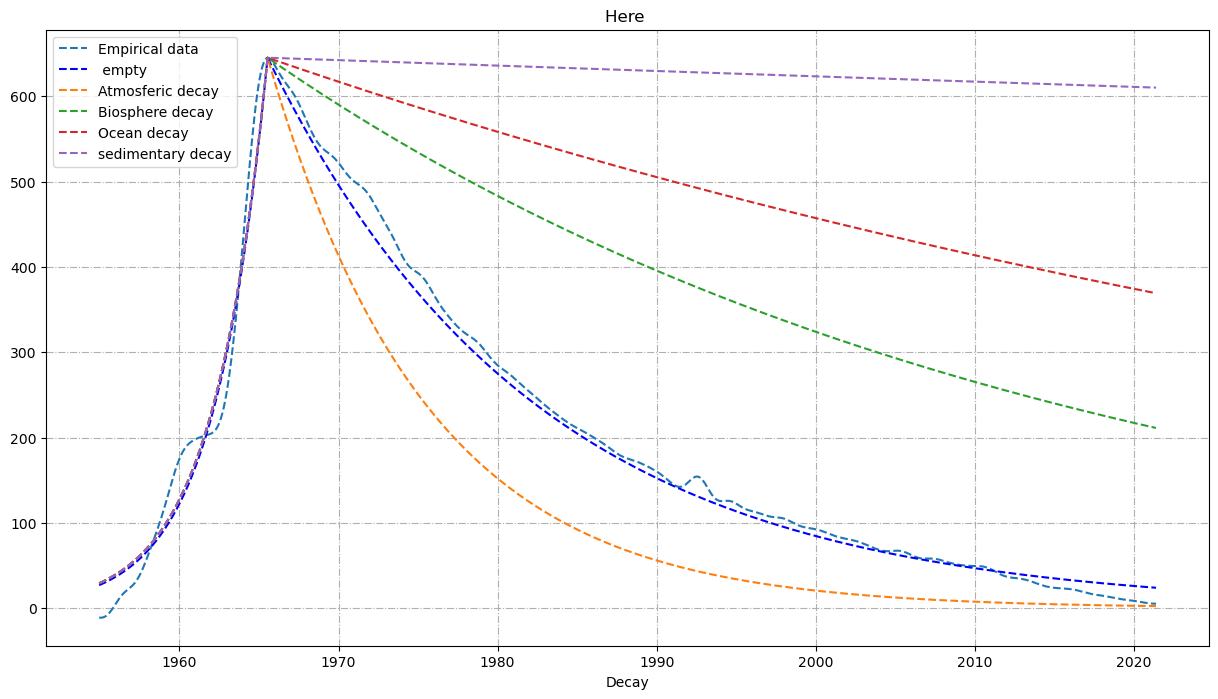

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [35]:
labels=["Atmosferic decay","Biosphere decay","Ocean decay","sedimentary decay" ]
# print(decay_lines_arrays[3])
title="Decay"
# modified, labels=append_yaxis_plot(decay_lines_arrays,model_func,labels,"CO2")
# print(len(decay_lines_arrays))
# print(len(labels))
# print(len(decay_lines_arrays))
array_plot(date,decay_lines_arrays,title,"date","y label", labels)
plt.figure(figsize=(15,8))
##Title and labels
# plt.title('Here ')
# plt.xlabel('Decay')
# # plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')
# plt.plot(date, d14c_trend, label='original', linestyle='--')

# plt.grid(linestyle='-.')

# plt.legend()
# plt.show()
# plt.close()
# plot(date,decay_lines_arrays[1],"Biosphere decay","date","decay")
# plot(date,decay_lines_arrays[2],"Ocean decay","date","decay")
# plot(date,decay_lines_arrays[3],"sedimentary decay","date","decay")
# plot(date,decay_lines_arrays[0],"Atmosferic decay","date","decay")

In [36]:
#a**2*<b|b>=1
acuad=1/((0.1)**2+(1)**(2)+(2)**(2)+(9)**(2))
print(acuad)
Asqr=0.1**2+1**2+2**2+9**2
new=np.sqrt(acuad)*Asqr
print(new)

0.01162655505173817
9.274157643689264


In [37]:
Asqr=0.1**2+1**2+2**2+9**2
print(np.sqrt(Asqr))
A=0.1+1+2+9

print(np.sqrt(0.1**2+1**2+2**2+9**2)/np.sqrt(Asqr))
print((0.1/np.sqrt(Asqr)))
# norm=np.sqrt(Asqr)

# print((A)/norm)
# new=((0.1+2+2+9)*(1/norm))**2
# print(np.sqrt(A))
# print(new)

9.274157643689264
1.0
0.010782650440285157


-0.091
k2 es:  0.059000000000000004


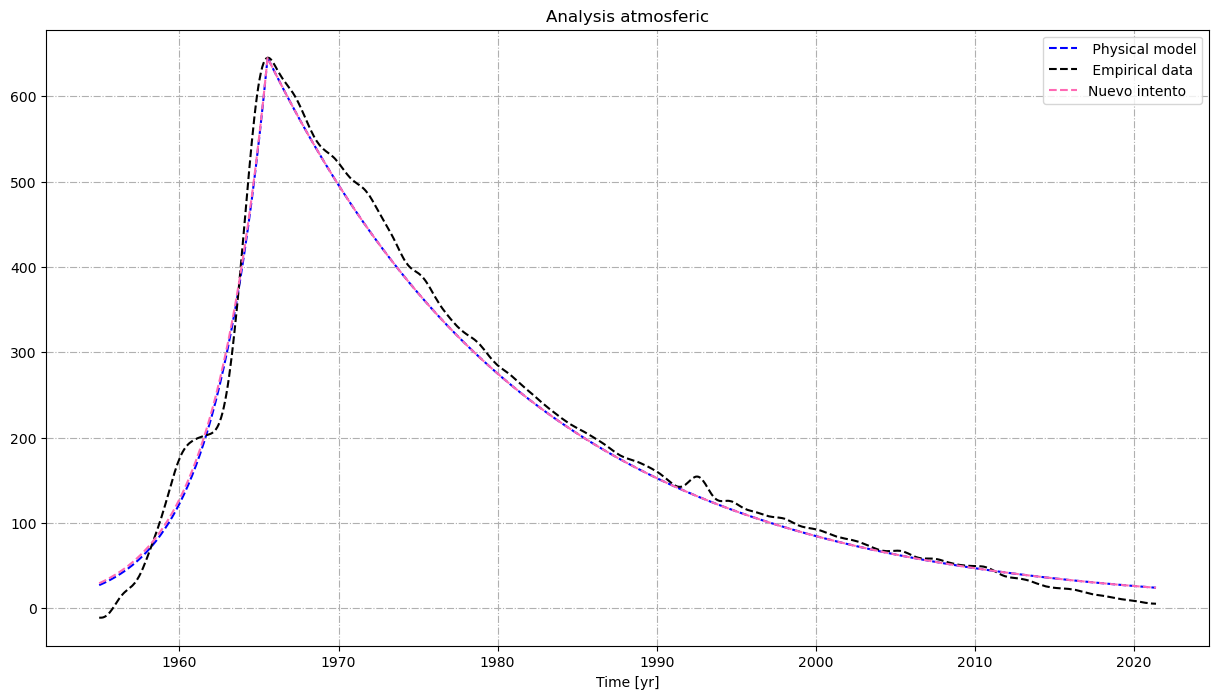

In [38]:

list=[0.10,0.02,0.01,0.001]
i=0
print(-list[i]+list[i+1]-list[i+2]-list[i+3])
k2=-list[i]+list[i+1]-list[i+2]-list[i+3]
def model_decay(list, peak_pair):
    i=0
    k2=(0.1*list[i]+list[i+1]+2*list[i+2]+9*list[i+3])
    print("k2 es: ", k2)
    # list=(k1,k2,k3,k4)
    array_for_arrays=[]
    dom=[date]
    #for i in range(len(list)):
    c1=peak_pair[1]*np.exp(-coef[0]*peak_pair[0])
    c2=peak_pair[1]*np.exp(k2*peak_pair[0])
    model_func=np.piecewise(date,[date<=date[pos],date>date[pos]], [lambda date: c1*np.exp(coef[0]*date), lambda date: c2*np.exp(-k2*date)])
    # array_for_arrays.append(model_func)
    return model_func

nuevo_intento=model_decay(list,peak_pair)
# plot(date,nuevo_intento, "intento","Decay","prob")
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
# plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')

plt.plot(date, model_func, color = "b", label=' Physical model', linestyle='--')
plt.plot(date, d14c_trend, color = "k", label=' Empirical data', linestyle='--')

plt.plot(date, nuevo_intento, color = "hotpink", label='Nuevo intento', linestyle='--')
# plt.plot(date, d14c_trend, color = "b", label=' empty', linestyle='--')



plt.grid(linestyle='-.')


plt.legend()
plt.show()

plt.close()

In [39]:

# list=[0.10,0.02,0.01,0.001]
# 0.05646833=a*list[i]+b*list[i+1]+c*list[i+2]+d*list[i+3]
# 1=a+b+c+d
# #Asigning 0.5 

#     # a=0.53
#     # b=0.22
#     # c=0.15
#     # d=0.1

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (984985899.py, line 2)

k2 es:  0.059480000000000005


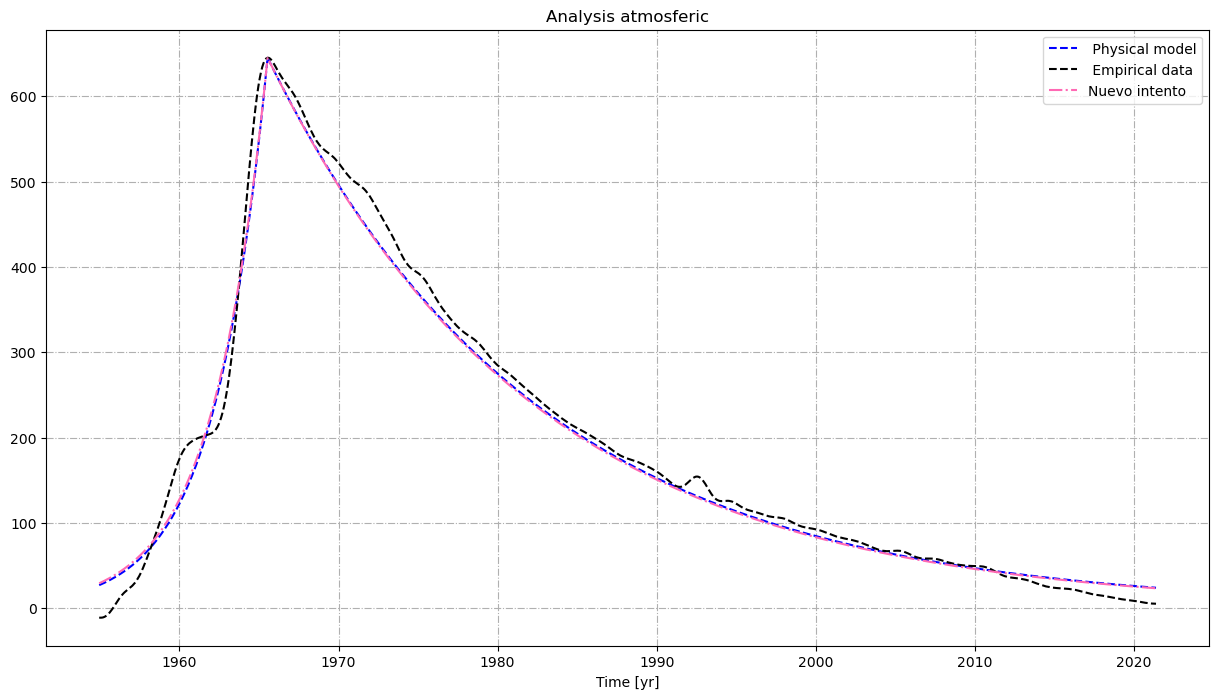

In [43]:

list=[0.10,0.02,0.01,0.001]
i=0
# print(-list[i]+list[i+1]-list[i+2]-list[i+3])
# k2=-list[i]+list[i+1]-list[i+2]-list[i+3]
def model_decay(list, peak_pair):
    i=0
    a=0.52
    b=0.34
    c=0.06
    d=0.08
    k2=(a*list[i]+b*list[i+1]+c*list[i+2]+d*list[i+3])
    print("k2 es: ", k2)
    # list=(k1,k2,k3,k4)
    array_for_arrays=[]
    dom=[date]
    #for i in range(len(list)):
    c1=peak_pair[1]*np.exp(-coef[0]*peak_pair[0])
    c2=peak_pair[1]*np.exp(k2*peak_pair[0])
    model_func=np.piecewise(date,[date<=date[pos],date>date[pos]], [lambda date: c1*np.exp(coef[0]*date), lambda date: c2*np.exp(-k2*date)])
    # array_for_arrays.append(model_func)
    return model_func

nuevo_intento=model_decay(list,peak_pair)
# plot(date,nuevo_intento, "intento","Decay","prob")
# Plot
#size of figure
plt.figure(figsize=(15,8))
##Title and labels
plt.title('Analysis atmosferic')
plt.xlabel('Time [yr]')
# plt.ylabel(r'$\Delta^{14}\text{CO}_2$(in %)')

plt.plot(date, model_func, color = "b", label=' Physical model', linestyle='--')
plt.plot(date, d14c_trend, color = "k", label=' Empirical data', linestyle='--')

plt.plot(date, nuevo_intento, color = "hotpink", label='Nuevo intento', linestyle='-.')
# plt.plot(date, d14c_trend, color = "b", label=' empty', linestyle='--')



plt.grid(linestyle='-.')


plt.legend()
plt.show()
plt.close()

In [ ]:
# Model function

def fit_model2(domain, a,b,c,d):
    """
    This is our regression model.
    Inputs: x_values (date), k -> free param.
    Output: model_func
    """
    # k2=list[i]+list[i+1]+list[i+2]+list[i+3]
    
    c1=peak_pair[1]*np.exp(-coef[0]*peak_pair[0])
    c2=peak_pair[1]*np.exp(k2*peak_pair[0])
    model_func=np.piecewise(date,[date<=date[pos],date>date[pos]], [lambda date: c1*np.exp(coef[0]*date), lambda date: c2*np.exp(-(a*list[i]+b*list[i+1]+c*list[i+2]+d*list[i+3])*date)])

    
    return model_func

coef, cova = opt.curve_fit(fit_model2, date, d14c_trend, p0=[0.5,0.2,0.1,0.1])

print(coef)

# Calculate uncertainties
print("cova es:", cova)
unc_coef = np.sqrt(np.diag(cova))

print("The associated uncertainty are:\n", unc_coef)